In [1]:
#import libraries for date-fruit classification
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import openpyxl


In [3]:
#read date-fruit dataset.xlsx
df = pd.read_excel('Date_Fruit_Datasets.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [5]:
#columns and their types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [6]:
#missing values
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [8]:
#all columns names 
df.columns



Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [9]:
#set target variable "Class"
target = df['Class']
#print unique values of target variable
print(target.unique())

['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


In [10]:
#encode target variable
le = LabelEncoder()
target = le.fit_transform(target)
print(target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [11]:
#set X and y
X = df.drop(['Class'], axis=1)
y = target
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print shape of train and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(718, 34) (180, 34) (718,) (180,)


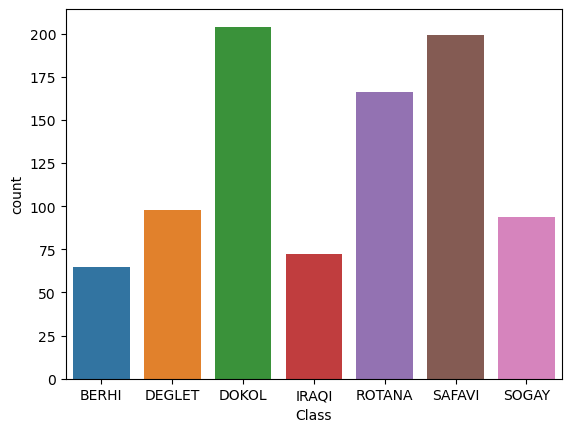

In [13]:
#plot of target variable before encoding
sns.countplot(x='Class', data=df)
plt.show()



In [14]:
#looking for the best parameters for XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = RandomizedSearchCV(xgb, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.892754 using {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}


Accuracy score:  0.9
F1 score:  0.8614846410197632
Recall score:  0.8639703153988868
Confusion matrix: 
 [[ 8  0  0  3  0  0  1]
 [ 0 16  0  0  0  0  4]
 [ 0  2 47  0  0  0  1]
 [ 0  0  0  9  0  0  1]
 [ 0  0  0  0 34  0  1]
 [ 0  0  0  0  0 32  1]
 [ 0  4  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.73      0.80      0.76        20
           2       1.00      0.94      0.97        50
           3       0.75      0.90      0.82        10
           4       1.00      0.97      0.99        35
           5       1.00      0.97      0.98        33
           6       0.64      0.80      0.71        20

    accuracy                           0.90       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.92      0.90      0.90       180



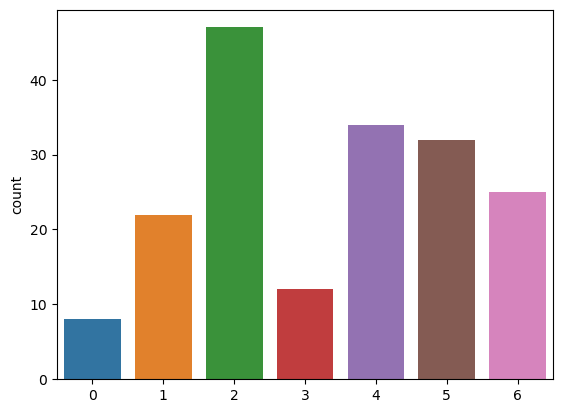

In [16]:
#XGBoost model
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.02)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()


Accuracy score:  0.8777777777777778
F1 score:  0.818797751275617
Recall score:  0.8368274582560297
Confusion matrix: 
 [[ 5  0  0  6  0  0  1]
 [ 0 17  0  0  2  0  1]
 [ 0  5 45  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 32  1]
 [ 0  5  0  0  0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.63      0.85      0.72        20
           2       1.00      0.90      0.95        50
           3       0.59      1.00      0.74        10
           4       0.94      0.97      0.96        35
           5       1.00      0.97      0.98        33
           6       0.83      0.75      0.79        20

    accuracy                           0.88       180
   macro avg       0.86      0.84      0.82       180
weighted avg       0.91      0.88      0.88       180



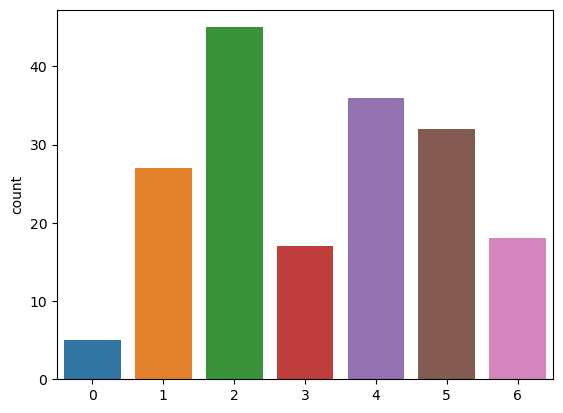

In [18]:
#random forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()



Accuracy score:  0.5055555555555555
F1 score:  0.3725052223846764
Recall score:  0.4142300556586271
Confusion matrix: 
 [[ 0  0  0  5  7  0  0]
 [ 0  0  0  0 15  1  4]
 [ 0  0 18  3 26  1  2]
 [ 0  0  1  3  4  2  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  4  1 27  1]
 [ 0  0  0  0 11  0  9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.95      0.36      0.52        50
           3       0.19      0.30      0.23        10
           4       0.35      0.97      0.51        35
           5       0.87      0.82      0.84        33
           6       0.56      0.45      0.50        20

    accuracy                           0.51       180
   macro avg       0.42      0.41      0.37       180
weighted avg       0.56      0.51      0.47       180



d:\python\odyn\anak2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\odyn\anak2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\odyn\anak2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

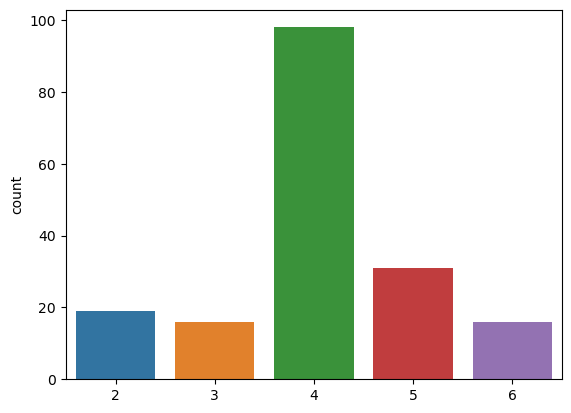

In [19]:
#logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()

Accuracy score:  0.6333333333333333
F1 score:  0.44783035041835223
Recall score:  0.47122448979591836
Confusion matrix: 
 [[ 0  2  5  2  3  0  0]
 [ 0  7  7  1  2  0  3]
 [ 0  2 41  0  0  7  0]
 [ 0  1  5  2  0  2  0]
 [ 0  6  0  0 29  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  8  8  0  2  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.27      0.35      0.30        20
           2       0.62      0.82      0.71        50
           3       0.40      0.20      0.27        10
           4       0.81      0.83      0.82        35
           5       0.79      1.00      0.88        33
           6       0.40      0.10      0.16        20

    accuracy                           0.63       180
   macro avg       0.47      0.47      0.45       180
weighted avg       0.57      0.63      0.58       180



d:\python\odyn\anak2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\odyn\anak2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\odyn\anak2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


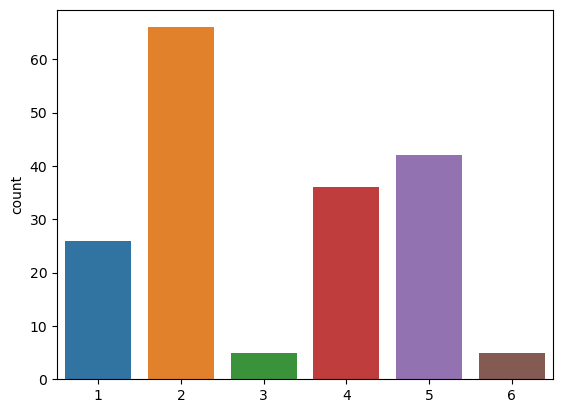

In [20]:
#support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()


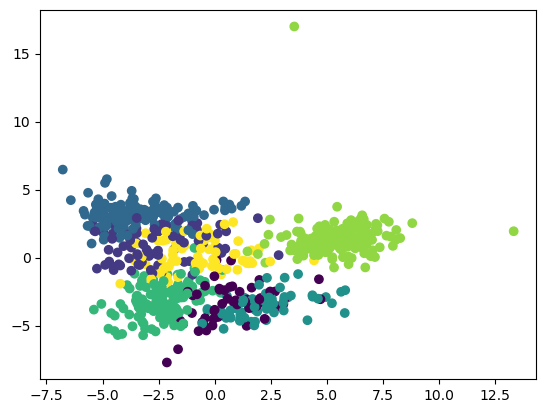

In [21]:
#standardization, making copy of X_train and X_test to not change original data
X_train_std = X_train.copy()
X_test_std = X_test.copy()
#standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_std)
X_test_std = scaler.transform(X_test_std)
#PCA
pca = PCA(n_components=2)
X_train_std = pca.fit_transform(X_train_std)
X_test_std = pca.transform(X_test_std)
#plot of data after standardization and PCA
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train)
plt.show()


Accuracy score:  0.7888888888888889
F1 score:  0.6906535660292422
Recall score:  0.6993877551020409
Confusion matrix: 
 [[ 3  0  0  5  2  0  2]
 [ 0 12  0  0  0  0  8]
 [ 0  7 43  0  0  0  0]
 [ 3  0  0  6  0  0  1]
 [ 3  0  0  0 31  0  1]
 [ 0  0  0  0  0 33  0]
 [ 0  5  0  0  1  0 14]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.50      0.60      0.55        20
           2       1.00      0.86      0.92        50
           3       0.55      0.60      0.57        10
           4       0.91      0.89      0.90        35
           5       1.00      1.00      1.00        33
           6       0.54      0.70      0.61        20

    accuracy                           0.79       180
   macro avg       0.69      0.70      0.69       180
weighted avg       0.81      0.79      0.79       180



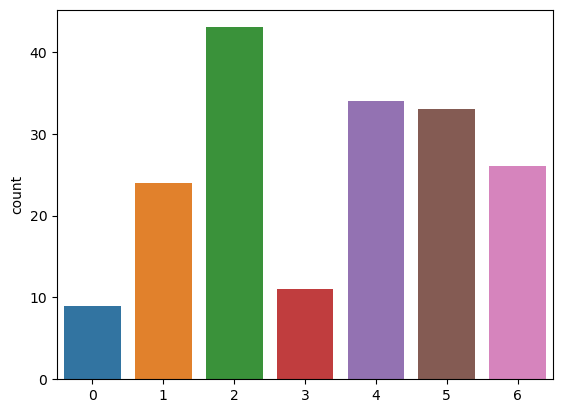

In [22]:
#XGBoost model after standardization and PCA
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.02)
xgb.fit(X_train_std, y_train)
y_pred = xgb.predict(X_test_std)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()


Accuracy score:  0.8222222222222222
F1 score:  0.7453616188952302
Recall score:  0.7672108843537415
Confusion matrix: 
 [[ 4  0  0  6  0  0  2]
 [ 0 13  0  0  0  0  7]
 [ 0  6 44  0  0  0  0]
 [ 0  0  0  9  0  0  1]
 [ 5  0  0  0 30  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  4  0  0  1  0 15]]
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.57      0.65      0.60        20
           2       1.00      0.88      0.94        50
           3       0.60      0.90      0.72        10
           4       0.97      0.86      0.91        35
           5       1.00      1.00      1.00        33
           6       0.60      0.75      0.67        20

    accuracy                           0.82       180
   macro avg       0.74      0.77      0.75       180
weighted avg       0.84      0.82      0.83       180



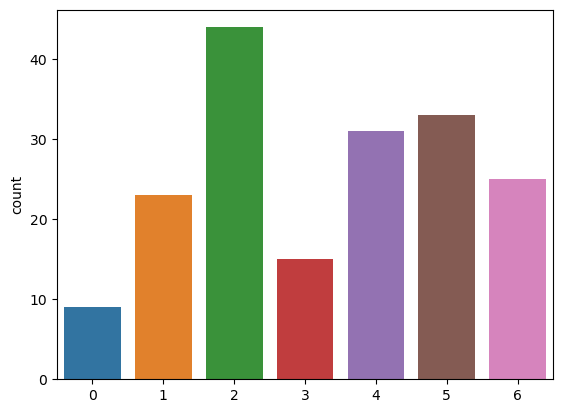

In [23]:
#random forest model after standardization and PCA
rf = RandomForestClassifier(n_estimators=200, max_depth=4)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()


Accuracy score:  0.8722222222222222
F1 score:  0.8090131124913734
Recall score:  0.8206122448979593
Confusion matrix: 
 [[ 6  0  0  4  1  0  1]
 [ 0 16  1  0  0  0  3]
 [ 0  1 49  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 2  0  0  0 32  0  1]
 [ 0  0  0  0  0 33  0]
 [ 0  8  0  0  1  0 11]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.64      0.80      0.71        20
           2       0.98      0.98      0.98        50
           3       0.71      1.00      0.83        10
           4       0.94      0.91      0.93        35
           5       1.00      1.00      1.00        33
           6       0.69      0.55      0.61        20

    accuracy                           0.87       180
   macro avg       0.82      0.82      0.81       180
weighted avg       0.88      0.87      0.87       180



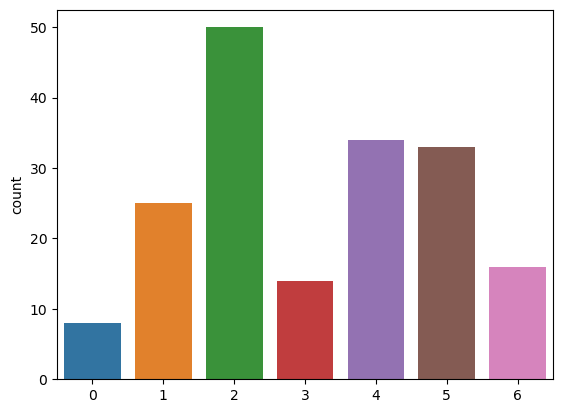

In [24]:
#logistic regression model after standardization and PCA
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()


Accuracy score:  0.8555555555555555
F1 score:  0.7863641946739695
Recall score:  0.8029931972789116
Confusion matrix: 
 [[ 5  0  0  5  1  0  1]
 [ 0 14  1  0  0  0  5]
 [ 0  3 47  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 3  0  0  0 32  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  6  0  0  1  0 13]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.61      0.70      0.65        20
           2       0.98      0.94      0.96        50
           3       0.67      1.00      0.80        10
           4       0.94      0.91      0.93        35
           5       1.00      1.00      1.00        33
           6       0.68      0.65      0.67        20

    accuracy                           0.86       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.86      0.86      0.85       180



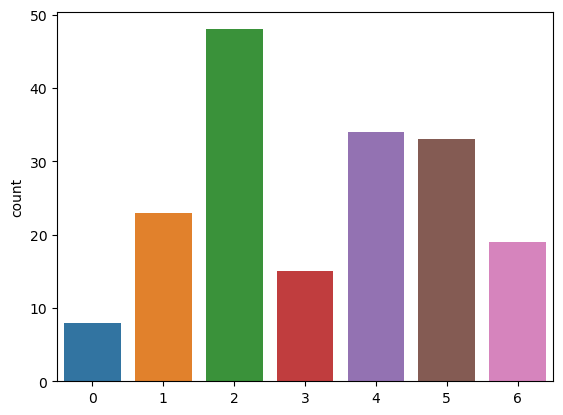

In [25]:
#support vector machine model after standardization and PCA
svm = SVC()
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='macro'))
print('Recall score: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#plot of target variable after encoding
sns.countplot(x=y_pred)
plt.show()
